In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris["feature_names"])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["target"]=iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'target'],axis='columns',inplace=True)

In [9]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [10]:
km=KMeans(n_clusters=3)

In [11]:
y_p=km.fit_predict(df)

In [12]:
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df["clusters"]=y_p

In [14]:
df.head(4)

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1


In [15]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

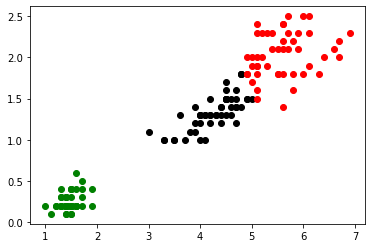

In [17]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="black")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red")

In [20]:
sse=[]

x_rang=range(1,20)

for k in x_rang:
    km=KMeans(n_clusters=k)
    km.fit_predict(df)
    sse.append(km.inertia_)

In [21]:
sse

[650.7886666666667,
 186.27970291146764,
 31.371358974358966,
 22.65903143812709,
 14.193126322751322,
 11.415117424242423,
 9.281343349632822,
 7.788416714864081,
 6.850950742240214,
 5.922604931188521,
 5.248788156288155,
 4.74828858073051,
 4.607333943833943,
 4.266541452699346,
 3.9003743308662666,
 3.5675837218337216,
 3.3109788544788556,
 3.1239612439531803,
 2.8892322852586023]

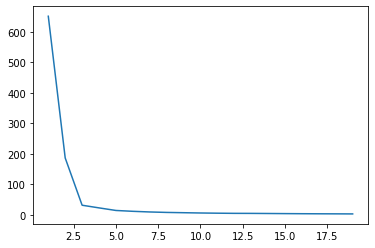

In [24]:
plt.plot(x_rang,sse)